In [1]:
#Unit 5 Python Activity - Data Analytics with Python and Data Storage Reflection
#import Pandas Library

import pandas as pd

#load dataset
df = pd.read_csv('WHO-COVID-19-global-data.csv')

# preview the first few rows; confirming the file loaded correctly and check the structure
 
print("\033[31mUniversity of Essex Online - Payman Ghorbani - Unit 5 Data Analytics with Python \033[0m\n\n")
print(df.head())

University of Essex Online - Payman Ghorbani - Unit 5 Data Analytics with Python 


  Date_reported Country_code  Country WHO_region  New_cases  Cumulative_cases  \
0    2020-01-05           AM  Armenia       EURO        NaN                 0   
1    2020-01-12           AM  Armenia       EURO        NaN                 0   
2    2020-01-19           AM  Armenia       EURO        NaN                 0   
3    2020-01-26           AM  Armenia       EURO        NaN                 0   
4    2020-02-02           AM  Armenia       EURO        NaN                 0   

   New_deaths  Cumulative_deaths  
0         NaN                  0  
1         NaN                  0  
2         NaN                  0  
3         NaN                  0  
4         NaN                  0  


In [3]:
# Convert 'Date_reported' to datetime format
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# Rename columns for easier access
df.rename(columns={
    'Country': 'Country',
    'New_cases': 'NewCases',
    'Cumulative_cases': 'TotalCases',
    'New_deaths': 'NewDeaths',
    'Cumulative_deaths': 'TotalDeaths'
}, inplace=True)

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Confirm structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 34045 entries, 12 to 70202
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_reported  34045 non-null  datetime64[ns]
 1   Country_code   34045 non-null  object        
 2   Country        34045 non-null  object        
 3   WHO_region     34045 non-null  object        
 4   NewCases       34045 non-null  float64       
 5   TotalCases     34045 non-null  int64         
 6   NewDeaths      34045 non-null  float64       
 7   TotalDeaths    34045 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 2.3+ MB
None
   Date_reported Country_code      Country WHO_region  NewCases  TotalCases  \
12    2020-03-29           AM      Armenia       EURO     234.0         424   
13    2020-04-05           AM      Armenia       EURO     398.0         822   
14    2020-04-12           AM      Armenia       EURO     191.0

In [4]:
#Basic analysis in Python; Mean and Median

mean_cases = df['NewCases'].mean()
median_cases = df['NewCases'].median()
mean_deaths = df['NewDeaths'].mean()
median_deaths = df['NewDeaths'].median()

print(f"Mean new cases: {mean_cases:.2f}")
print(f"Median new cases: {median_cases:.2f}")
print(f"Mean new deaths: {mean_deaths:.2f}")
print(f"Median new deaths: {median_deaths:.2f}")

#Correlation between cases and deaths

correlation = df[['NewCases','NewDeaths']].corr()
print("Correlation matrix:\n", correlation)

#Top 10 .max().sortCountries by total cases

tentop_countries = df.groupby('Country')['TotalCases'].max().sort_values(ascending=False).head(10)
print("Top Ten countries by total cases: \n", tentop_countries)

Mean new cases: 22752.67
Median new cases: 578.00
Mean new deaths: 204.86
Median new deaths: 6.00
Correlation matrix:
            NewCases  NewDeaths
NewCases   1.000000   0.291305
NewDeaths  0.291305   1.000000
Top Ten countries by total cases: 
 Country
United States of America    103436829
China                        99381761
India                        45055954
France                       39036849
Germany                      38437756
Brazil                       37770150
Republic of Korea            34571873
Japan                        33803572
Italy                        26968555
Russian Federation           24901467
Name: TotalCases, dtype: int64


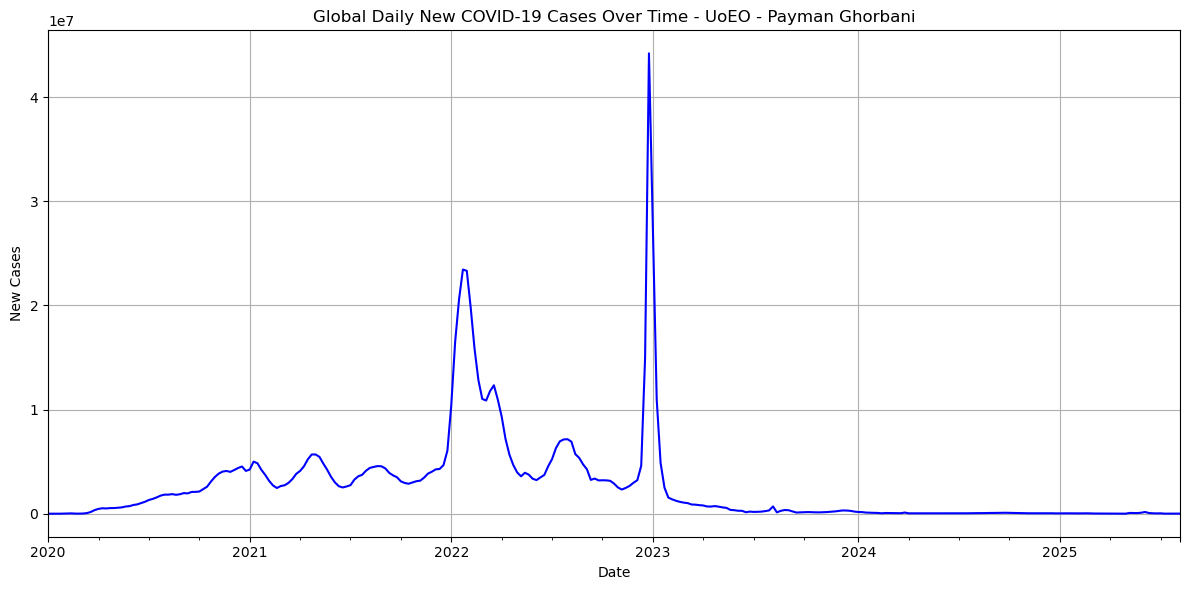

In [6]:
import matplotlib.pyplot as plt
#group new cases by date
#Global New Cases Over Time (Line Chart)
#This shows how new cases evolved globally across time.


daily_cases = df.groupby('Date_reported')['NewCases'].sum()

# Plot
plt.figure(figsize=(12,6))
daily_cases.plot(kind='line', color='blue')
#Top horizontal axis title
plt.title('Global Daily New COVID-19 Cases Over Time - UoEO - Payman Ghorbani')
#ottom horizontal axis label
plt.xlabel('Date')
#Vertical axis label
plt.ylabel('New Cases')
#Adding a grid to the plot
plt.grid(True)
# Automatically adjusts the spacing between plot elements
plt.tight_layout()
#Displaying the plot window
plt.show()

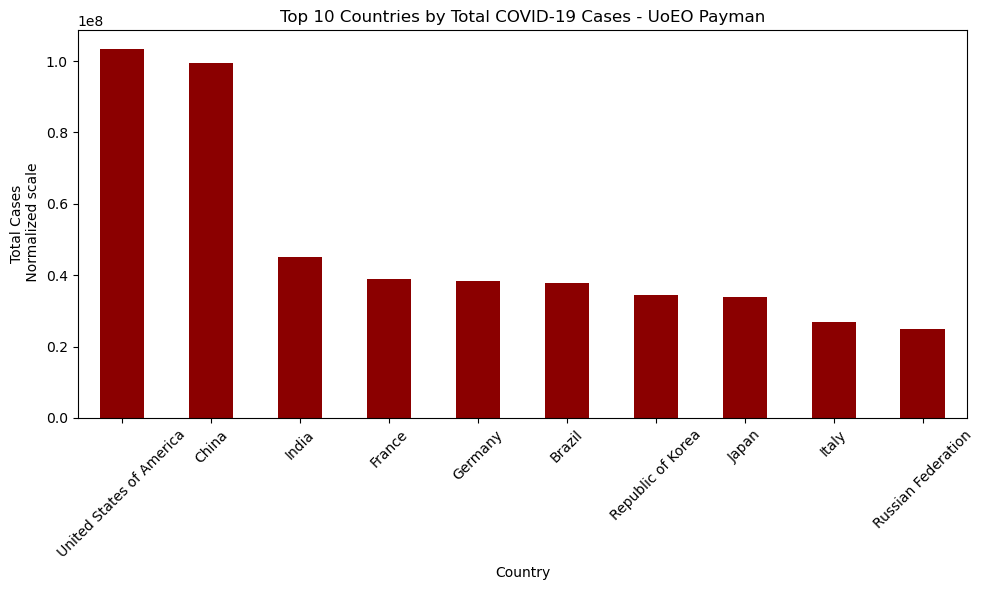

In [10]:
#Top 10 Countries by Total Cases (Bar Chart)
# this chart uses Normalized scale meaning 1 unit= 100,000,000 people
# Get top 10 countries by max total cases
top_countries = df.groupby('Country')['TotalCases'].max().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='darkred')
plt.title('Top 10 Countries by Total COVID-19 Cases - UoEO Payman')
plt.xlabel('Country')
plt.ylabel('Total Cases\n Normalized scale')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#


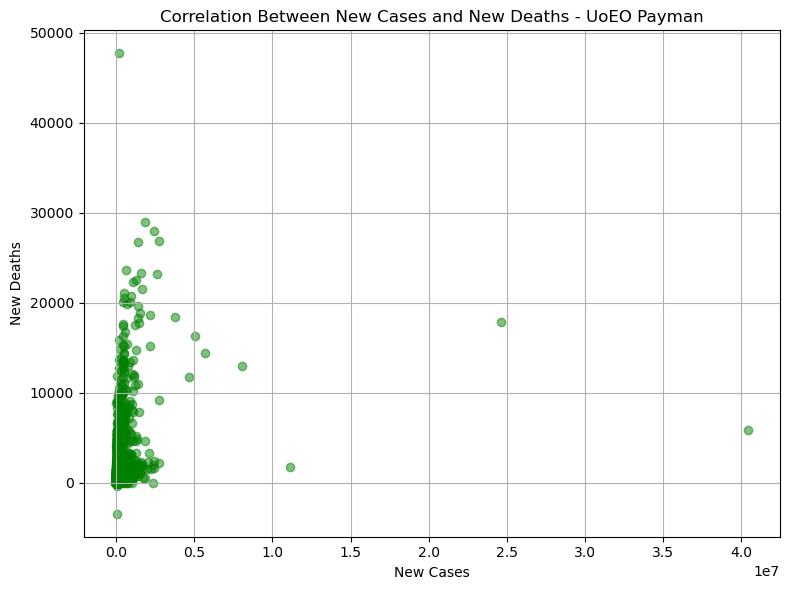

In [12]:
#Correlation Between New Cases and New Deaths (Scatter Plot)
#This gives a sense of how closely new cases and deaths are linked.

plt.figure(figsize=(8,6))
plt.scatter(df['NewCases'], df['NewDeaths'], alpha=0.5, color='green')
plt.title('Correlation Between New Cases and New Deaths - UoEO Payman')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()
